<a href="https://colab.research.google.com/github/Binod-budathoki/Analyzing_selling_price_of_used_cars/blob/main/nepali_bert_news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/THESIS_10/SirDatasetNepali/news_dataset.csv")
data = data[['label','text']]
data['label'].value_counts()

Bichar             11527
ArthaBanijya        4591
Swasthya            4540
Sahitya             4068
SuchanaPrabidhi     4050
Prabas              3645
Khelkud             3625
Manoranjan          3601
Viswa               2929
Desh                2749
Name: label, dtype: int64

In [ ]:
labelExchange = {
    'ArthaBanijya':'business',
    'SuchanaPrabidhi':'technology',
    'Khelkud':'sports',
    'Manoranjan':'entertainment',
    'Viswa':'world'
}

print(list(labelExchange.keys()))
data = data[data['label'].isin(list(labelExchange.keys()))]
data['label'] = data.apply(lambda x: labelExchange[x['label']],axis=1)
data['label'].value_counts()

['ArthaBanijya', 'SuchanaPrabidhi', 'Khelkud', 'Manoranjan', 'Viswa']


business         4591
technology       4050
sports           3625
entertainment    3601
world            2929
Name: label, dtype: int64

In [ ]:
if False: # False for single dataset  /// TRUE for Integrated dataset
  df = pd.read_csv("/content/drive/MyDrive/THESIS_10/BERT_Classification/NewsData.csv")
  df = df.rename(columns={'Content':'text','Category':'label'})
  df = df[['label','text']]

  data = pd.concat([data,df])

data

,label,text
0,business,"घर जग्गा कारोबारमा आत्मविश्वास गुमेको वर्ष""बैं..."
1,business,हुन् आशंका हटेर सर्वसाधारणमा आत्मविश्वास नआएसम...
2,business,विभिन्न नीतिमध्ये निक्षेप बिमाले सबैभन्दा बढी ...
3,business,संस्थागत सुशासनमा गरिएको कडाइले पुष्टि गर्छ से...
4,business,दायरा फराकिलो बनाउनुका साथै ऋण सहज बनाएकाले बि...
...,...,...
45320,world,अस्ट्रेलियामा पनि गैरकानुनीअस्ट्रेलियाको क्यान...
45321,world,सन् मा संघीय कानुनले पुरुष र महिलाबीचको कानुनल...
45322,world,त्यहाँको तल्लो र माथिल्लो दुवै सदनले बहुमतले अ...
45323,world,राष्ट्रसंघको रासायनिक हतियारविरुद्ध योजनारासाय...


In [ ]:
data['Category'] = data["label"].factorize()[0]
category =  data[['Category','label']].drop_duplicates().sort_values('label')
category

,Category,label
0,0,business
22492,2,entertainment
18867,1,sports
33806,3,technology
42396,4,world


In [ ]:
id2label = {getattr(x,'Category'):getattr(x, "label") for x in category.itertuples()}
label2id = {getattr(x, "label"):getattr(x,'Category') for x in category.itertuples()}

label2id, id2label

({'business': 0, 'entertainment': 2, 'sports': 1, 'technology': 3, 'world': 4},
 {0: 'business', 2: 'entertainment', 1: 'sports', 3: 'technology', 4: 'world'})

In [ ]:
# label2id = {news_class[i].split('/')[0]:i for i in range(len(news_class))}
# id2label = {i:news_class[i].split('/')[0] for i in range(len(news_class))}

# label2id, id2label

In [ ]:
# import os
# import re

# # print("TESTS")
# # print([os.path.exists(os.path.join(path,cls)) for cls in news_class])
# # for cls in news_class:
# #   print([os.path.exists(os.path.join(path,cls,"{}.txt".format(i+1))) for i in range(1000)])

# ###--------------------------

# import numpy as np
# import pandas as pd
# from tqdm.auto import tqdm

# step = 100
# data = pd.DataFrame(columns = ['label','text'])
# for cls in news_class:

#   label = cls.split("/")[0]
#   print("Running",label)
#   for i in tqdm(range(1000)):
#     file = open(os.path.join(path,cls,"{}.txt".format(i+1)),'r',encoding='utf-8')
#     text = file.read()
#     text = re.sub('\s+'," ",text).strip().split(" ")
#     text = [" ".join(text[j:j+step]) for j in range(0,len(text),step)]
#     data = pd.concat([data,
#                       pd.DataFrame({
#                           'file':[int(i+1) for j in range(len(text))],
#                           'label':[label for j in range(len(text))],
#                           'text':text})])

# data.index = range(data.shape[0])
# print(data.shape)
# data.head()
# data.to_csv('news_dataset.csv')

In [ ]:
# if True: # add Data to Swasthya
#     health = pd.read_csv("/kaggle/input/nepcov19news/NepCovNews.csv")
#     health = health.drop(labels=['Unnamed: 0'],axis=1)
#     health['len'] = health.apply(lambda x: len(x['text'].split(" ")),axis=1)
#     health.index = range(health.shape[0])

#     from tqdm.auto import tqdm

#     text = ['']
#     j = 0
#     tlen = 0
#     for i in tqdm(health.index):
#         tlen += health.iloc[i].len
#         if tlen > step:
#             j+=1
#             tlen = health.iloc[i].len
#             text.append(health.iloc[i].text)
#         else:
#             text[j] += health.iloc[i].text

#     data = pd.concat([data,
#                       pd.DataFrame({'label':['Swasthya' for i in range(len(text))],
#                                     'text':text,
#                                     'file':[1001.0 for i in range(len(text))]})])

In [ ]:
data['label'].value_counts()

business         4591
technology       4050
sports           3625
entertainment    3601
world            2929
Name: label, dtype: int64

In [ ]:
import datasets

data = datasets.Dataset.from_pandas(data).shuffle(999).train_test_split(test_size=0.2)
data


DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'Category', '__index_level_0__'],
        num_rows: 15036
    })
    test: Dataset({
        features: ['label', 'text', 'Category', '__index_level_0__'],
        num_rows: 3760
    })
})

In [ ]:
def LabelEncoding(x):
    x['label'] = label2id[x['label']]
    return x

data = data.map(
        LabelEncoding,
        num_proc=4)

data['train'][:5]

Map (num_proc=4):   0%|          | 0/15036 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/3760 [00:00<?, ? examples/s]

{'label': [0, 0, 0, 2, 0],
 'text': ['बढाउँदा कच्चा तेल मागभन्दा बढी उत्पादन हुन गयो त्यही कारणले अहिले कच्चा तेलको मूल्य घटेको हो हाल अमेरिकाले दैनिक झन्डै करोड लाख ब्यारेल कच्चा तेल उत्पादन गरिरहेको अनुमान छ आईईएले भने कच्चा तेलको उत्पादन बढी नभएको जनाएको छ आईईएले आपूर्तिको अवस्था राम्रो रहेको तर बढी नरहेको भनेको छ यो वर्ष कच्चा तेलको माग दैनिक लाख ब्यारेलले बढ्ने जोउँदै आईईएले गार्हस्थ उत्पादनमा देखिएको सुस्तताका कारण उत्पादन प्रभावित हुनसक्ने पनि जनाएको छ इरानमाथि नाकाबन्दी गर्ने हो भने कच्चा तेलको मूल्य आकासिन सक्छ आईईएको चेतावनी छ आईएचएस सेराका अध्यक्ष डानियल येर्गिनले इरानमाथि हुने नाकाबन्दीका कारण मूल्य आकासिन सक्ने सम्भावना रहेकै बेला कच्चा तेलको',
  'अर्ब रुपैयाँ राजस्व संकलन गर्ने लक्ष्य लिएको छ पहिलो महिनाको उठेको राजस्व गत वर्षको भन्दा प्रतिशत बढी भए पनि लक्ष्य भने छुन सकेको छैन अर्थ सम्बद्ध स्रोतकै अनुसार राजस्व आय कम नहुने गरी भन्सार दर कम गर्न सकिने सम्भावना छ हाल वजन अनुसार लाग्दै आएको करलाई घटाएर रुपैयाँ अनुसार लगाउने हो भने राजस्व संकलनमा पनि धेरै असर पर्दैन उनले भने

In [ ]:
from transformers import TFBertForSequenceClassification, BertTokenizerFast

model_id = 'Shushant/nepaliBERT'

tokenizer = BertTokenizerFast.from_pretrained(model_id)
tokenizer

model = TFBertForSequenceClassification.from_pretrained(model_id,
          id2label=id2label,
          label2id=label2id, from_pt=True)

model.config

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertConfig {
  "_name_or_path": "Shushant/nepaliBERT",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "business",
    "1": "sports",
    "2": "entertainment",
    "3": "technology",
    "4": "world"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "business": 0,
    "entertainment": 2,
    "sports": 1,
    "technology": 3,
    "world": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.33.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [ ]:
%%time

def preprocess_function(rows):
    return tokenizer(rows['text'],truncation=True)

print("Tokenizing the data")
tokenized_inputs = data.map(
    preprocess_function,
    batched=True,
    num_proc=4,
    remove_columns=data["train"].column_names,
)
# tokenized_inputs = tokenized_inputs.remove_columns(['token_type_ids'])

tokenized_inputs['train'] = tokenized_inputs['train'].add_column(
    name="label",column=data['train']['label']
)
tokenized_inputs['test'] = tokenized_inputs['test'].add_column(
    name="label",column=data['test']['label']
)

tokenized_inputs

Tokenizing the data


Map (num_proc=4):   0%|          | 0/15036 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map (num_proc=4):   0%|          | 0/3760 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


CPU times: user 398 ms, sys: 367 ms, total: 766 ms
Wall time: 12.8 s


DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'label'],
        num_rows: 15036
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'label'],
        num_rows: 3760
    })
})

In [ ]:
print(data['train'][:1])
print(tokenized_inputs['train'][:1]['input_ids'])
print(tokenizer.batch_decode(tokenized_inputs['train'][:1]['input_ids']))

{'label': [0], 'text': ['बढाउँदा कच्चा तेल मागभन्दा बढी उत्पादन हुन गयो त्यही कारणले अहिले कच्चा तेलको मूल्य घटेको हो हाल अमेरिकाले दैनिक झन्डै करोड लाख ब्यारेल कच्चा तेल उत्पादन गरिरहेको अनुमान छ आईईएले भने कच्चा तेलको उत्पादन बढी नभएको जनाएको छ आईईएले आपूर्तिको अवस्था राम्रो रहेको तर बढी नरहेको भनेको छ यो वर्ष कच्चा तेलको माग दैनिक लाख ब्यारेलले बढ्ने जोउँदै आईईएले गार्हस्थ उत्पादनमा देखिएको सुस्तताका कारण उत्पादन प्रभावित हुनसक्ने पनि जनाएको छ इरानमाथि नाकाबन्दी गर्ने हो भने कच्चा तेलको मूल्य आकासिन सक्छ आईईएको चेतावनी छ आईएचएस सेराका अध्यक्ष डानियल येर्गिनले इरानमाथि हुने नाकाबन्दीका कारण मूल्य आकासिन सक्ने सम्भावना रहेकै बेला कच्चा तेलको'], 'Category': [0], '__index_level_0__': [3447]}
[[2, 17383, 1743, 367, 1044, 2391, 5430, 2397, 22676, 1743, 2243, 29722, 9994, 402, 1030, 5642, 2218, 1779, 2064, 1024, 12323, 1024, 367, 1044, 2391, 16860, 6056, 1022, 17722, 1014, 1742, 2415, 7728, 1745, 1024, 384, 2057, 8555, 1051, 2407, 2149, 16956, 1681, 1024, 367, 1044, 2391, 5430, 29722, 9994

In [ ]:
from transformers import DataCollatorWithPadding

print("Initializing Data Collator")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer,
                                        max_length=128,
                                        return_tensors="tf")

Initializing Data Collator


In [ ]:
print("Preparing Training and Testing sets to TRAIN the MODEL")
tf_train_set = model.prepare_tf_dataset(
    tokenized_inputs["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_test_set = model.prepare_tf_dataset(
    tokenized_inputs["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Preparing Training and Testing sets to TRAIN the MODEL


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2436: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


# Training Section

In [ ]:
from transformers import create_optimizer, AdamWeightDecay

optimizer = AdamWeightDecay(learning_rate=5e-6, weight_decay_rate=0.0001)
model.compile(optimizer=optimizer)

In [18]:
%%time
n_epoch = 3

print("Training the model")
history = model.fit(x=tf_train_set,
          validation_data=tf_test_set,
          epochs=n_epoch)
print(history.history)

Training the model
Epoch 1/3
939/939 [==============================] - 824s 877ms/step - loss: 0.1000 - val_loss: 0.2228
Epoch 2/3
939/939 [==============================] - 819s 872ms/step - loss: 0.0731 - val_loss: 0.2269
Epoch 3/3
939/939 [==============================] - 800s 852ms/step - loss: 0.0523 - val_loss: 0.2418
{'loss': [0.10003599524497986, 0.07308397442102432, 0.052296221256256104], 'val_loss': [0.2227722555398941, 0.22694900631904602, 0.2418137788772583]}
CPU times: user 23min 46s, sys: 4min 20s, total: 28min 6s
Wall time: 41min 22s


<Axes: >

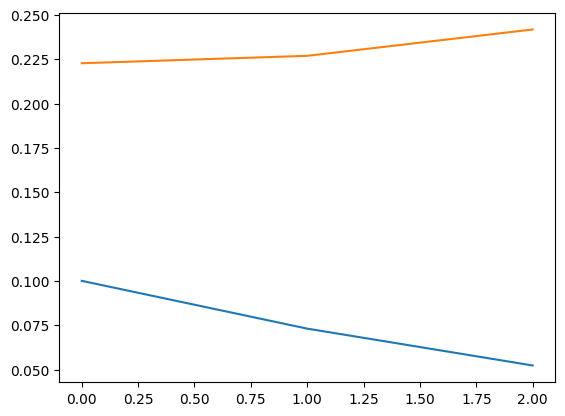

In [19]:
import seaborn

seaborn.lineplot(history.history['loss'])
seaborn.lineplot(history.history['val_loss'])

# Evaluation Section

In [20]:
%%time
from transformers import pipeline, TextClassificationPipeline

print("Getting Test Prediction")
if False:
  pred_labels = [np.argmax(tf.nn.softmax(model(tf.constant(x)).logits)) for x in tokenized_inputs['test']['input_ids']]
else:
  pipe = pipeline('sentiment-analysis',model=model,tokenizer=tokenizer,device=1)
  prediction = pipe(data['test']['text'])
  pred_labels = [model.config.label2id[x['label']] for x in prediction]


Getting Test Prediction
CPU times: user 13min 12s, sys: 1.48 s, total: 13min 13s
Wall time: 13min 25s


In [21]:
actual_labels = data['test']['label']

In [22]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print("F1-Score",f1_score(actual_labels,pred_labels,average='weighted'))
print("Precision-Score",precision_score(actual_labels,pred_labels,average='weighted'))
print("Recall-Score",recall_score(actual_labels,pred_labels,average='weighted'))
print("accuracy_Score",accuracy_score(actual_labels,pred_labels))

F1-Score 0.9357061134915932
Precision-Score 0.9360036858778368
Recall-Score 0.9356382978723404
accuracy_Score 0.9356382978723404


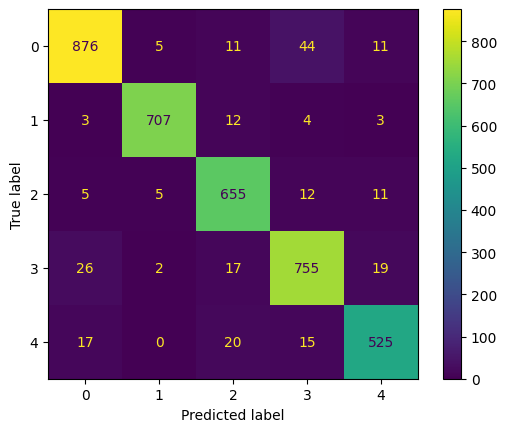

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf

cmd = ConfusionMatrixDisplay(tf.math.confusion_matrix(actual_labels,pred_labels,num_classes=5).numpy())
cmd.plot()